# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [6]:
df = pd.read_csv("marketing_campaign.csv")

In [7]:
df.shape

(2240, 29)

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Setting Display options to ensure feature name visibility

In [10]:
pd.set_option('display.max_columns',None)

# Warning Suppression

In [11]:
import warnings
warnings.filterwarnings('ignore')

# Drop ID Feature from the dataset

In [12]:
df=df.drop(['ID'],axis=1)

# Defining Target and Independent Features

In [13]:
Y=df[['Response']]
X=df.drop(['Response'],axis=1)

# Get the Response Rate

In [14]:
Y.mean()

Response    0.149107
dtype: float64

# Build Derived Features - Customer Age and Tenure

In [15]:
import datetime
reference_date=datetime.datetime(2022,1,1)
print(reference_date)

2022-01-01 00:00:00


In [16]:
X['Year_Birth']=pd.to_datetime(df['Year_Birth'], format='%Y')
X['Age'] = (reference_date- X['Year_Birth']).astype('timedelta64[Y]')

X['Dt_Customer']=pd.to_datetime(X['Dt_Customer'])
X['Cust_Tenure'] = (reference_date- X['Dt_Customer']).astype('timedelta64[Y]')

X=X.drop(['Year_Birth','Dt_Customer'],axis=1)

In [17]:
X[['Age','Cust_Tenure']].head()

,Age,Cust_Tenure
0,65.0,9.0
1,68.0,7.0
2,57.0,8.0
3,38.0,7.0
4,41.0,7.0


# Split features into Numerical and Categorical

In [18]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [19]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [20]:
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
Income,1974
Kidhome,3
Teenhome,3
Recency,100
MntWines,776


In [21]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

Kidhome                  int64
Teenhome                 int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Cust_Tenure            float64
dtype: object

In [22]:
def data_type_converter(x):
    x=x.astype('object')
    return(x)
cat=cat.apply(lambda x : data_type_converter(x))
cat.dtypes

Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Cust_Tenure            object
dtype: object

In [23]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [24]:
char=pd.concat([char,cat],axis=1,join="inner")

In [25]:
print ("The shape of numerical dataframe :",num.shape)
print ("The shape of categorical datafrme :",char.shape)

The shape of numerical dataframe : (2240, 9)
The shape of categorical datafrme : (2240, 18)


# Outlier Analysis of Numerical Features

In [26]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,53.178125
std,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,12.008965
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000
1%,7579.200000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,30.000000
5%,18985.500000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,34.000000
10%,24117.500000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,38.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,45.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,52.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,63.000000


# Capping and Flooring of outliers

In [27]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [28]:
num=num.apply(lambda x : outlier_cap(x))

In [29]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51770.277076,49.101786,302.909821,26.158482,165.075446,37.351366,26.873688,43.770089,53.118750
std,20728.704775,28.949501,333.316827,39.208270,216.547373,53.985910,40.484302,51.118104,11.689759
min,7579.200000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,30.000000
1%,7646.520000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,30.000000
5%,18985.500000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,34.000000
10%,24117.500000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,38.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,45.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,52.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,63.000000


# Missing Value Handling - Numerical Features

In [30]:
num.isnull().mean()

Income              0.010714
Recency             0.000000
MntWines            0.000000
MntFruits           0.000000
MntMeatProducts     0.000000
MntFishProducts     0.000000
MntSweetProducts    0.000000
MntGoldProds        0.000000
Age                 0.000000
dtype: float64

# Missing Value Handling - Numerical Features (Imputation with Mean)

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [32]:
num_1.isnull().mean()

Income              0.0
Recency             0.0
MntWines            0.0
MntFruits           0.0
MntMeatProducts     0.0
MntFishProducts     0.0
MntSweetProducts    0.0
MntGoldProds        0.0
Age                 0.0
dtype: float64

# Missing Value Handling - Categorical Features (Remove >25% Missing Rows)

In [33]:
char.isnull().sum()

Education              0
Marital_Status         0
Kidhome                0
Teenhome               0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Cust_Tenure            0
dtype: int64

# Feature Selection - Numerical Features

# Part 1 : Remove Features with 0 Variance

In [34]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num_1)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_2 = num_1.iloc[:,cols]

In [35]:
num_2.iloc[0]

Income              58138.0
Recency                58.0
MntWines              635.0
MntFruits              88.0
MntMeatProducts       546.0
MntFishProducts       172.0
MntSweetProducts       88.0
MntGoldProds           88.0
Age                    65.0
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [36]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_2),index=num_2.index, columns=num_2.columns).add_suffix('_Rank')
num_binned.head()

,Income_Rank,Recency_Rank,MntWines_Rank,MntFruits_Rank,MntMeatProducts_Rank,MntFishProducts_Rank,MntSweetProducts_Rank,MntGoldProds_Rank,Age_Rank
0,5.0,5.0,8.0,8.0,9.0,8.0,7.0,8.0,8.0
1,4.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0
2,7.0,2.0,7.0,7.0,6.0,7.0,5.0,6.0,6.0
3,1.0,2.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0
4,6.0,9.0,4.0,6.0,6.0,6.0,6.0,3.0,1.0


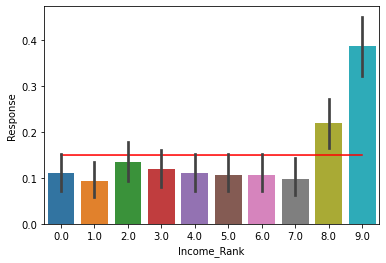

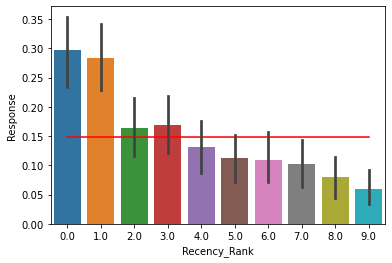

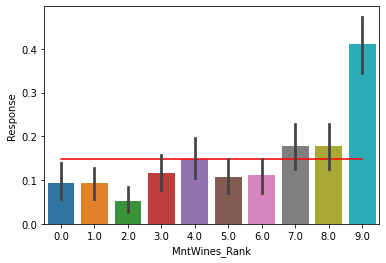

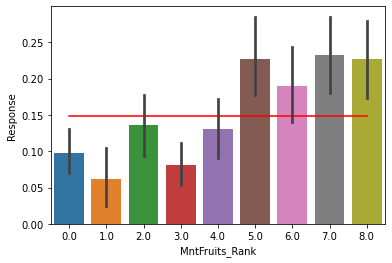

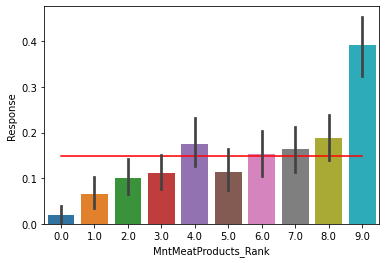

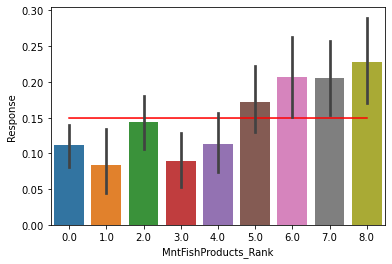

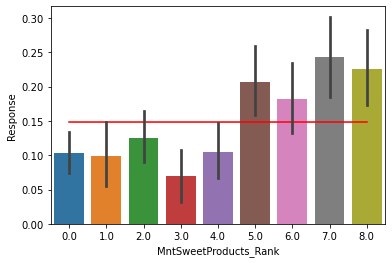

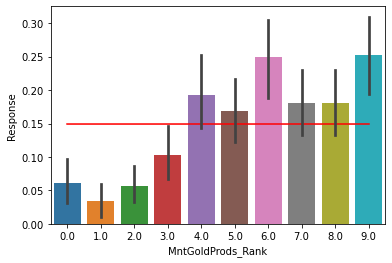

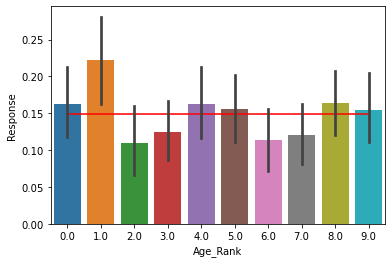

In [37]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Response'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="Response",data=X_bin_combined, estimator=mean )
plt.show()

In [38]:
# All features from num_2 gets selected except Age due to good discrimination
num_droplist=['Age']
num_2 = num_2.drop(num_droplist,axis=1)
num_2.shape

(2240, 8)

# Part 3 - Select K Best (Statistical Significant Features)

In [39]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=6)
#This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X relative to the classes.
selector.fit_transform(num_2, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]

#chi-square test measures dependence between variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [40]:
select_features_df_num.iloc[0]

Income             58138.0
MntWines             635.0
MntFruits             88.0
MntMeatProducts      546.0
MntFishProducts      172.0
MntGoldProds          88.0
Name: 0, dtype: float64

# Feature Selection - Categorical Features

In [41]:
char.dtypes

Education              object
Marital_Status         object
Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Cust_Tenure            object
dtype: object

In [42]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x : unique_levels(x)))

In [43]:
char_unique_levels

,0
Education,5
Marital_Status,8
Kidhome,3
Teenhome,3
NumDealsPurchases,15
NumWebPurchases,15
NumCatalogPurchases,14
NumStorePurchases,14
NumWebVisitsMonth,16
AcceptedCmp3,2


In [44]:
char_unique_levels.columns=['feature_levels']
slice1=char_unique_levels.loc[char_unique_levels['feature_levels']>1]
cat_list=slice1.index
char=char.loc[:,cat_list]

In [45]:
char

,Education,Marital_Status,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Cust_Tenure
0,Graduation,Single,0,0,3,8,10,4,7,0,0,0,0,0,0,9
1,Graduation,Single,1,1,2,1,1,2,5,0,0,0,0,0,0,7
2,Graduation,Together,0,0,1,8,2,10,4,0,0,0,0,0,0,8
3,Graduation,Together,1,0,2,2,0,4,6,0,0,0,0,0,0,7
4,PhD,Married,1,0,5,5,3,6,5,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,0,1,2,9,3,4,5,0,0,0,0,0,0,8
2236,PhD,Together,2,1,7,8,2,5,7,0,0,0,1,0,0,7
2237,Graduation,Divorced,0,0,1,2,3,13,6,0,1,0,0,0,0,7
2238,Master,Together,0,1,2,6,5,10,3,0,0,0,0,0,0,7


# Part 1 - Bi Variate Analysis

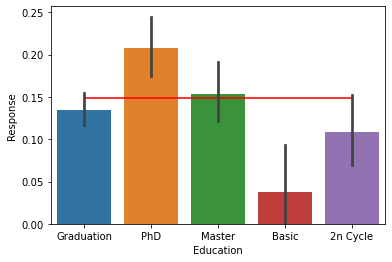

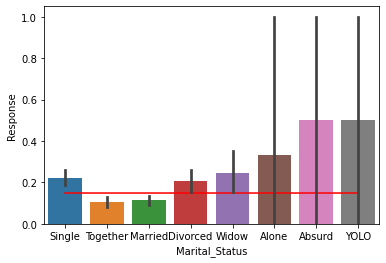

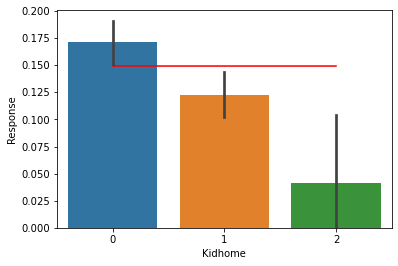

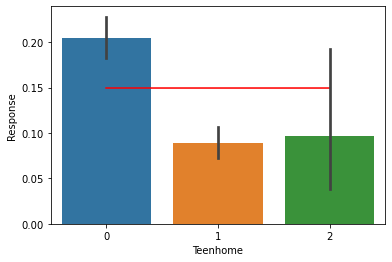

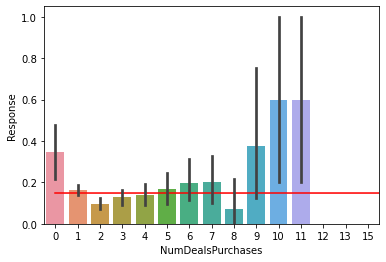

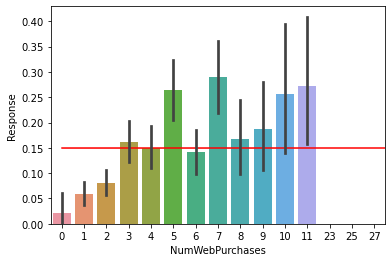

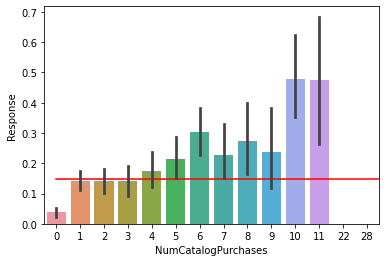

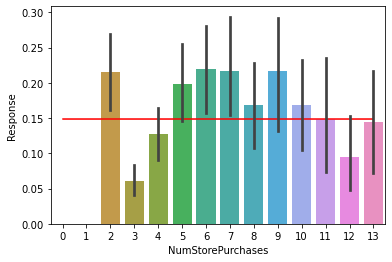

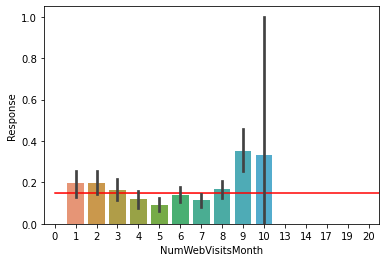

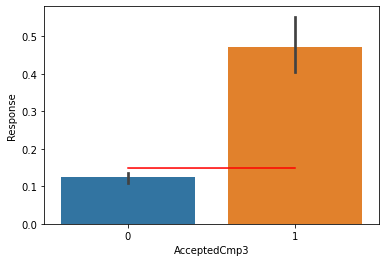

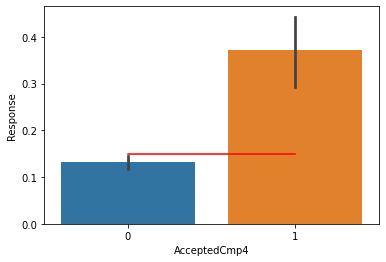

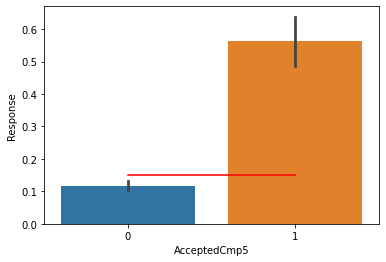

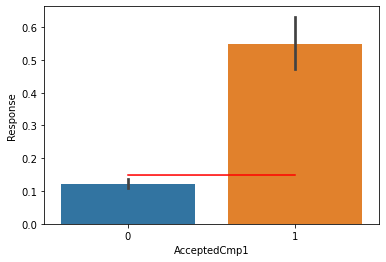

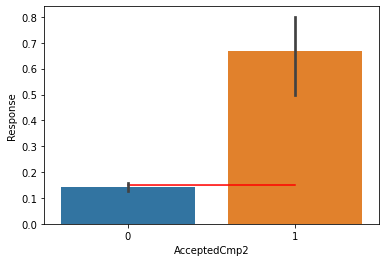

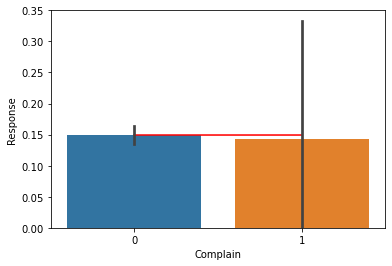

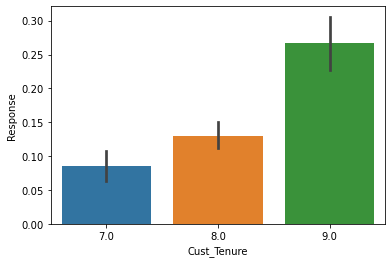

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['Response'].mean(),data=X_char_merged,color='red')
    sns.barplot(x=col, y="Response",data=X_char_merged, estimator=mean )
plt.show()

In [47]:
#As the features Education, NumStorePurchases ,Complain doesn't have good discrimination, therefore dropping them

char_droplist=['Education','NumStorePurchases','Complain']
char=char.drop(char_droplist,axis=1)
char.shape

(2240, 13)

In [48]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(2240, 74)

# Part 2 - Select K Best (Statistical Significant Features)

In [49]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=70)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [50]:
select_features_df_char.dtypes

Marital_Status_Alone       uint8
Marital_Status_Divorced    uint8
Marital_Status_Married     uint8
Marital_Status_Single      uint8
Marital_Status_Together    uint8
                           ...  
AcceptedCmp5_1             uint8
AcceptedCmp1_1             uint8
AcceptedCmp2_1             uint8
Cust_Tenure_8.0            uint8
Cust_Tenure_9.0            uint8
Length: 70, dtype: object

# Creating the Master Feature Set for Model Development

In [51]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

# Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=20)

In [53]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (1568, 76)
Shape of Testing Data (672, 76)
Response Rate in Training Data Response    0.149872
dtype: float64
Response Rate in Testing Data Response    0.147321
dtype: float64


# Building Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=20)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=20)

# Building Decision Tree Model

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=20)

# Grid Search for Model Optimization

In [56]:
# Min_Samples_Split starting from 5% of training base
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [75,100,125,150] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 100}


In [57]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=20,max_depth=5,min_samples_split=75)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=75, random_state=20)

# Building Random Forest Mode

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=20,max_depth=5,min_samples_split=75)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=75, random_state=20)

# Building Gradient Boosting Model

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=20,max_depth=5,min_samples_split=75)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=5, min_samples_split=75,
                           random_state=20)

# Model Evaluation

In [60]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [61]:
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [62]:
print("Accuracy from Logistic Regression Model :",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision from Logistic Regression Model :",metrics.precision_score(y_test,y_pred_logreg))
print("Recall from Logistic Regression Model :",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score from Logistic Regression Model :",metrics.f1_score(y_test,y_pred_logreg))
print("Area under ROC Curve from Logistic Regression Model :",metrics.roc_auc_score(y_test,y_pred_logreg))
print("Gini from the Logistic Regression Model :",2*metrics.roc_auc_score(y_test,y_pred_logreg)-1)

Accuracy from Logistic Regression Model : 0.8556547619047619
Precision from Logistic Regression Model : 0.6
Recall from Logistic Regression Model : 0.06060606060606061
f1_score from Logistic Regression Model : 0.11009174311926605
Area under ROC Curve from Logistic Regression Model : 0.5268126289068698
Gini from the Logistic Regression Model : 0.0536252578137395


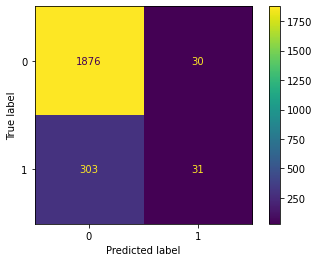

In [63]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [64]:
print("Accuracy from Decision Tree Model :",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision from Decision Tree Model :",metrics.precision_score(y_test,y_pred_tree))
print("Recall from Decision Tree Model :",metrics.recall_score(y_test,y_pred_tree))
print("f1_score from Decision Tree Model :",metrics.f1_score(y_test,y_pred_tree))
print("Area under ROC Curve from Decision Tree Model :",metrics.roc_auc_score(y_test,y_pred_tree))
print("Gini from the Decision Tree Model :",2*metrics.roc_auc_score(y_test,y_pred_tree)-1)

Accuracy from Decision Tree Model : 0.8735119047619048
Precision from Decision Tree Model : 0.6944444444444444
Recall from Decision Tree Model : 0.25252525252525254
f1_score from Decision Tree Model : 0.37037037037037035
Area under ROC Curve from Decision Tree Model : 0.6166640224231847
Gini from the Decision Tree Model : 0.2333280448463695


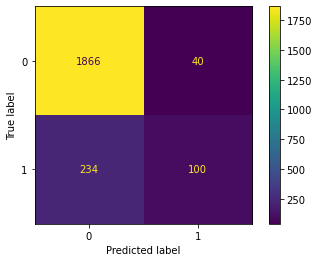

In [65]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [66]:
print("Accuracy from Random Forest Model :",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision from Random Forest Model :",metrics.precision_score(y_test,y_pred_rf))
print("Recall from Random Forest Model :",metrics.recall_score(y_test,y_pred_rf))
print("f1_score from Random Forest Model :",metrics.f1_score(y_test,y_pred_rf))
print("Area under ROC Curve from Random Forest Model :",metrics.roc_auc_score(y_test,y_pred_rf))
print("Gini from the Random Forest Model :",2*metrics.roc_auc_score(y_test,y_pred_rf)-1)

Accuracy from Random Forest Model : 0.8571428571428571
Precision from Random Forest Model : 1.0
Recall from Random Forest Model : 0.030303030303030304
f1_score from Random Forest Model : 0.05882352941176471
Area under ROC Curve from Random Forest Model : 0.5151515151515151
Gini from the Random Forest Model : 0.030303030303030276


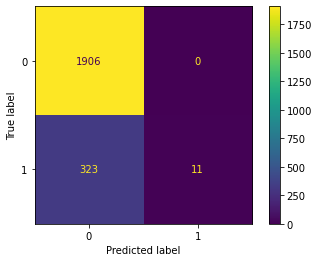

In [67]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [68]:
print("Accuracy from GBM Model :",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision from GBM Model :",metrics.precision_score(y_test,y_pred_gbm))
print("Recall from GBM Model :",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score from GBM Model :",metrics.f1_score(y_test,y_pred_gbm))
print("Area under ROC Curve from GBM Model :",metrics.roc_auc_score(y_test,y_pred_gbm))
print("Gini from the GBM Model :",2*metrics.roc_auc_score(y_test,y_pred_gbm)-1)

Accuracy from GBM Model : 0.8779761904761905
Precision from GBM Model : 0.6666666666666666
Recall from GBM Model : 0.3434343434343434
f1_score from GBM Model : 0.45333333333333337
Area under ROC Curve from GBM Model : 0.6568829657834893
Gini from the GBM Model : 0.3137659315669785


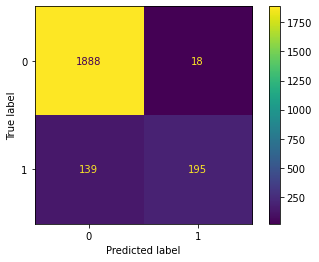

In [69]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

# Extracting Feature Importance from the best model

In [70]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances.shape

(76, 1)

# Extracting the Top 10 Important Model Features

In [71]:
feature_importances.iloc[0:10]

,importance
AcceptedCmp5_1,0.159356
MntMeatProducts,0.117802
AcceptedCmp3_1,0.081842
MntWines,0.069465
Income,0.051676
MntFishProducts,0.045445
AcceptedCmp1_1,0.045028
MntGoldProds,0.044416
Cust_Tenure_9.0,0.044080
MntFruits,0.034647


# Plotting the top 10 feature importances in a Horizontal Bar Plot

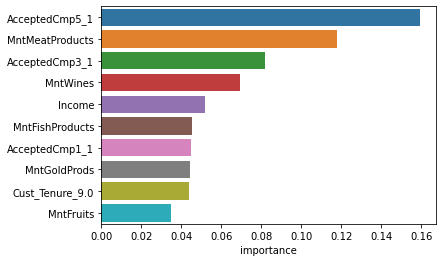

In [72]:
ax=sns.barplot(x='importance',y=feature_importances.iloc[0:10].index,data=feature_importances.iloc[0:10])

# Project Conclusion :- 

The GBM Model has performed the best and will be used for Campaign Strategizing 

Since Customer Accepted Offer for Campaign 5 and Amount of Meat products are the most important features for the GBM model

Therefore building a Business Value Strategy based on Customer Accepted Offer for Campaign 5 and Amount of Meat products

# Getting the Model Probabilities

In [73]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1] #The method accepts a single argument that corresponds to the data over which the probabilities will be computed and returns an array of lists containing the class probabilities for the input data points
df['pred_prob']=pd.DataFrame(y_pred_prob)

# Creating Rank based on the Model Probabilities

In [74]:
df['P_Rank_gbm']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1 ##qcut as a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins
df[['pred_prob','P_Rank_gbm']].head()

,pred_prob,P_Rank_gbm
0,0.796649,10
1,0.017138,2
2,0.031152,4
3,0.017517,2
4,0.023672,3


# Utlize APT framework to build a Machine Learning Driven Strategy

# A - Audience (Who do we target?)

In [75]:
df['Predicted_Resp_Rank']=np.where(df['P_Rank_gbm']>=9,"Top 2","Bottom 8")
df['Predicted_Resp_Rank'].value_counts()

Bottom 8    1792
Top 2        448
Name: Predicted_Resp_Rank, dtype: int64

In [76]:
df_top2=df.loc[df['Predicted_Resp_Rank']=="Top 2",:]
df_top2.shape

(448, 31)

# P - Prioritization (Based on Business Value and Customer Engagement)

In [77]:
df_top2['spend_cnt']=np.count_nonzero(df_top2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']],axis=1)
df_top2['spend_cnt'].describe()

count    448.000000
mean       5.555804
std        0.800734
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        6.000000
Name: spend_cnt, dtype: float64

In [78]:
df_top2['Engagement']=np.where(df_top2['spend_cnt']<df_top2['spend_cnt'].quantile(0.75),"Low","High")
df_top2['Engagement'].value_counts()

High    315
Low     133
Name: Engagement, dtype: int64

In [79]:
df_top2['Total_Spend']=df_top2['MntWines']+df_top2['MntFruits']+df_top2['MntMeatProducts']+df_top2['MntFishProducts']+df_top2['MntSweetProducts']+df_top2['MntGoldProds']
df_top2['Total_Spend'].describe()

count     448.000000
mean     1018.712054
std       706.068777
min        18.000000
25%       317.500000
50%      1133.000000
75%      1631.500000
max      2525.000000
Name: Total_Spend, dtype: float64

In [80]:
df_top2['spend_level']=np.where(df_top2['Total_Spend']<df_top2['Total_Spend'].quantile(0.75),"Low Spend","High Spend")
df_top2['spend_level'].value_counts()

Low Spend     336
High Spend    112
Name: spend_level, dtype: int64

In [81]:
pd.crosstab(index=df_top2['spend_level'], columns=df_top2['Engagement'],values=df_top2['Response'],aggfunc='mean')

Engagement,High,Low
spend_level,,
High Spend,0.704545,0.625000
Low Spend,0.629956,0.559633


In [82]:
pd.crosstab(index=df_top2['spend_level'], columns=df_top2['Engagement'],values=df_top2['Response'],aggfunc='count')

Engagement,High,Low
spend_level,,
High Spend,88,24
Low Spend,227,109


In [83]:
df_priority_1=df_top2.loc[(df_top2['spend_level']=='High Spend') & (df_top2['Engagement']=='Low'),:]
df_priority_1.shape

(24, 35)

In [84]:
df_priority_1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,pred_prob,P_Rank_gbm,Predicted_Resp_Rank,spend_cnt,Engagement,Total_Spend,spend_level
18,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,0.288671,9,Top 2,5,Low,1782,High Spend
126,1984,Graduation,Single,79607.0,0,0,2013-04-21,37,450,133,951,173,0,216,1,3,6,6,1,0,0,0,0,0,0,3,11,1,0.778340,10,Top 2,5,Low,1923,High Spend
246,1972,Graduation,Married,80134.0,1,0,2013-05-20,40,1218,16,272,104,0,80,2,5,3,6,6,0,1,1,1,0,0,3,11,1,0.853712,10,Top 2,5,Low,1690,High Spend
519,1944,Master,Married,80184.0,0,0,2014-03-01,19,1035,134,670,25,38,0,1,6,3,10,3,0,0,1,1,0,0,3,11,0,0.264716,9,Top 2,5,Low,1902,High Spend
523,1953,Graduation,Married,70503.0,0,0,2012-09-30,73,1379,33,216,0,33,66,1,2,4,9,6,0,1,1,0,0,0,3,11,0,0.235637,9,Top 2,5,Low,1727,High Spend
543,1982,PhD,Married,84169.0,0,0,2013-08-07,9,1478,19,403,0,19,0,1,7,6,6,3,0,1,1,0,0,0,3,11,1,0.900488,10,Top 2,4,Low,1919,High Spend
586,1955,Graduation,Widow,79800.0,0,0,2012-09-23,65,1060,21,530,32,0,224,1,5,11,5,3,1,0,1,1,0,0,3,11,1,0.954209,10,Top 2,5,Low,1867,High Spend
644,1947,Master,Together,77632.0,0,0,2013-03-10,73,1200,105,758,0,42,147,1,4,2,6,2,0,1,1,0,0,0,3,11,1,0.767973,10,Top 2,5,Low,2252,High Spend
735,1949,Graduation,Married,72025.0,0,0,2014-04-29,46,967,0,617,43,50,0,1,4,8,13,2,0,1,1,1,0,0,3,11,1,0.767223,10,Top 2,4,Low,1677,High Spend
766,1977,Graduation,Married,74985.0,0,0,2012-09-11,8,587,51,898,247,0,86,1,3,6,7,2,0,0,0,0,0,0,3,11,0,0.398977,9,Top 2,5,Low,1869,High Spend


In [85]:
df_priority_2=df_top2.loc[(df_top2['spend_level']=='High Spend') & (df_top2['Engagement']=='High'),:]
df_priority_2.shape

(88, 35)

In [86]:
df_priority_3=df_top2.loc[(df_top2['spend_level']=='Low Spend') & (df_top2['Engagement']=='High'),:]
df_priority_3.shape

(227, 35)

In [87]:
df_priority_4=df_top2.loc[(df_top2['spend_level']=='Low Spend') & (df_top2['Engagement']=='Low'),:]
df_priority_4.shape

(109, 35)

# T - Treatment (Identify Service/Product Preferences of each Priority Segment)

In [88]:
spend_cat_priority1=df_priority_1[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [89]:
spend_avg = spend_cat_priority1.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            1140.791667
MntMeatProducts      512.083333
MntGoldProds          76.500000
MntFishProducts       54.166667
MntFruits             45.708333
MntSweetProducts      19.625000
dtype: float64

In [90]:
spend_cat_priority2=df_priority_2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [91]:
spend_avg = spend_cat_priority2.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            926.943182
MntMeatProducts     656.431818
MntFishProducts     103.965909
MntGoldProds         79.000000
MntSweetProducts     75.227273
MntFruits            73.806818
dtype: float64

In [92]:
spend_cat_priority3=df_priority_3[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [93]:
spend_avg = spend_cat_priority3.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            363.555066
MntMeatProducts     225.550661
MntGoldProds         61.048458
MntFishProducts      50.537445
MntSweetProducts     40.303965
MntFruits            37.563877
dtype: float64

In [94]:
spend_cat_priority4=df_priority_4[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [95]:
spend_avg = spend_cat_priority4.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            383.073394
MntMeatProducts     136.513761
MntGoldProds         54.330275
MntFishProducts      15.238532
MntFruits            12.642202
MntSweetProducts     10.348624
dtype: float64

# Strategy build for creating the campaign :

1) Audience should be the top 20% of the people as per the ranked data. This would lead to 80% reduction in Marketing cost and higher response rate.

2) 1st Priority : People with Low Engagement and High Spend

   2nd Priority : People with High Engagement and High Spend
    
   3rd Priority : People with High Engagement and Low Spend
    
   4th Proirity : People with Low Engagement and Low Spend
    
3) The best offers should be provided on the following products:
   Wines/Fish/Meat/Gold

    


# Objective of the Project
Leverage the spend behavior and past campaign responses to build a response model that can
be used to devise a strategy that enhances the response rates and improves profitability of marketing campaigns

# Algorithms Used :
In this project we have used Logistic Regression, Decision Trees, Random Forests and Gradient Boosting Algorithms

# Final Model Algorithm
Among the models that we tried building the GBM Algorithm performed the best in terms of F1_Score, Area under ROC Curve
and overall Model Gini

Therefore we have kept GBM as the final model algorithm

# Grid Search CV parameters
Maximum Depth of Tree - 5

Minimum Sample Size for Nodes to be Split - 75 Observations

# Model Performance Measures
Accuracy from GBM Model : 0.86


Precision from GBM Model : 0.58


Recall from GBM Model : 0.25


f1_score from GBM Model : 0.35


Area under ROC Curve from GBM Model : 0.61


Gini from the GBM Model : 0.22 